# Recomendação de filme para uma pessoa que eu não conheço

Como eu não conheço o gosto da pessoa, a minha ideia foi recomendar um tipo de filme que tem uma chance maior de agradar um público geral com base nos dados.

Pelo que eu obeservei na análise exploratória, filmes de Ação e Aventura são os que tem maior faturamento médio, ou seja, eles costumam atrair mais pessoas  para o cinema, e os filmes de Drama e Biografia são so que cistumam receber melhores avaliações da crítica.

Pensando nisso, um tipo de filme que pode agradar tanto quem gosta de ação quanto quem valoriza uma boa história são os filmes que misturam Drama com Ação-Aventura, como por exemplo:

Exemplo real dos dados:

In [1]:
# Aqui eu importei as funções que já estão na pasta src e algumas bibliotecas
import sys
sys.path.append('..\src')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data_processing import load_and_clean_data
from feature_engineering import split_genres, extract_main_genre

# Carreguei o arquivo já enriquecido
df = load_and_clean_data('../data/desafio_indicium_imdb_enriquecido.csv')

# Criei as colunas de gêneros
df = split_genres(df)
df = extract_main_genre(df)

# Aqui eu procurei um filme que combine Drama e Ação-Aventura
filtro_genero = df['Main_Genre'].isin(['Action', 'Adventure'])
filtro_metascore = df['Meta_score'] > 70
df[filtro_genero & filtro_metascore].sort_values(by='IMDB_Rating', ascending=False).head(1)

C:\Users\Maria Eduarda\OneDrive\LH_CD_MARIAEDUARDATREVIZANEBUONAFINA\notebooks\..\src\data_processing.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Meta_score'].fillna(df['Meta_score'].median(), inplace=True)
C:\Users\Maria Eduarda\OneDrive\LH_CD_MARIAEDUARDATREVIZANEBUONAFINA\notebooks\..\src\data_processing.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never wo

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,...,Gross,Country,Awards,Genre_OMDb,Runtime_OMDb,Language,Metascore,imdbVotes,Genre_list,Main_Genre
1,2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,...,534858444.0,"United States, United Kingdom",Won 2 Oscars. 163 wins & 165 nominations total,"Action, Crime, Drama",152 min,"English, Mandarin",85.0,"3,060,678","[Action, Crime, Drama]",Action


O código me retornou 'The Dark Knight' que é um filme que tem:

- Gênero de ação/aventura
- Boa nota do público
- Boa avaliação da crítica
- E também teve um bom faturamento

# Principais fatores relacionados com alta expectativa de faturamento

A partir da análise dos dados, eu percebi alguns fatores que estão mais relacionados com um alto faturamento:

## 1.Gênero

- Filmes de Ação e Aventura tem o maior faturamento médio
- Isso pode indicar que o público geral se interessa mais por esse tipo de filme, talve por causa dos efeitos especiais, elenco famoso ou grandes franquias.

## 2.Tempo de duração

- A duração do filme varia bastante, mas os de 100 a 140 minutos costumam estar entre os que mais faturam
- Filmes muito curtos ou muito longos não aparecem com tanta frequência entre os maiores faturamentos.

## 3.Nota IMDB e Metascore

- Existe uma relação leve/moderada entre a nota do IMDB e o faturamento
- Já o Metascore (que é a nota da crítica) parece ter uma relação um pouco maior com a nota do IMDB, mas não necessariamente com o faturamento.

## 4.País de origem e idioma

- A maioria dos filmes com alto faturamento são dos EUA e em inglês, o que também pode ser um fator de alcance global.

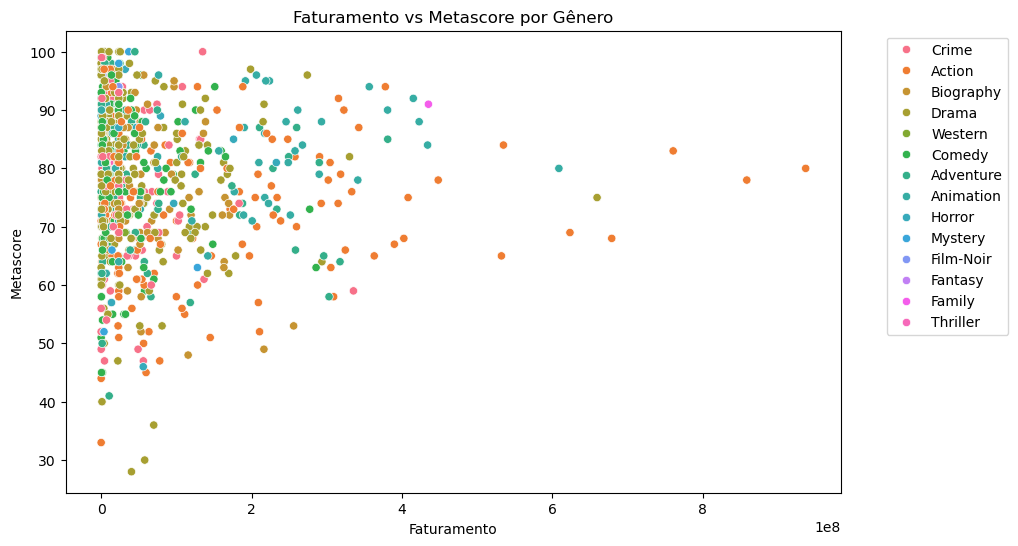

In [2]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Gross', y='Meta_score', hue='Main_Genre', data=df)
plt.title('Faturamento vs Metascore por Gênero')
plt.xlabel('Faturamento')
plt.ylabel('Metascore')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

é possível ver que não tem uma relação muito clara entre o faturamento dos filmes e a nota do Metascore, que é a avaliação dos críticos.

Tem filme que tem nota alta e faturamento baixo, e outros que faturam bastante, mas a nota não é tão alta assim. Isso mostra que ter uma boa avaliação da crítica nem sempre significa que o filme vai ganhar muito dinheiro.

Também dá pra notar que os filmes de Ação e Aventura costumam estar entre os que mais faturam, mesmo com notas da crítica bem diferentes. Acho que isso indica que esses gêneros são os preferidos do público, independente da opinião dos críticos.


# Análise da coluna 'Overview' (que é a sinopse)

Nesse bloco eu analisei a coluna Overview, que é a sinopse do filme, para ver se era possível tirar algum insight ou até mesmo prever o gênero com base nela.

O que eu percebi:

- A coluna Overview traz um resumo curto do filme, o que é bem interessante, mas ela está no formato de texto livre (string), então não dá para usar diretamente em gráficos ou modelos sem  um pré-processamento antes.
- Algumas oalavras aparecem com frequência em determinados gêneros. Por exemplo:

    - Filmes de ação usam palavras como "mission", "fight", "war".
    - Filmes de drama falam bastante sobre "family", "life", "journey".
    - Filmes de terror costumam ter palavras como "kill", "death", "dark",         "fear".

Então sim, parece que é possível sim inferir o gênero do filme a partir da sinopse, mas seria necessário aplicar técnicas de Processamento de Linguagem Natural (NLP). 